In [1]:
# The code was removed by DSX for sharing.

,mpg,cylinders,engine,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,American,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,American,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,American,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,American,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,American,ford torino


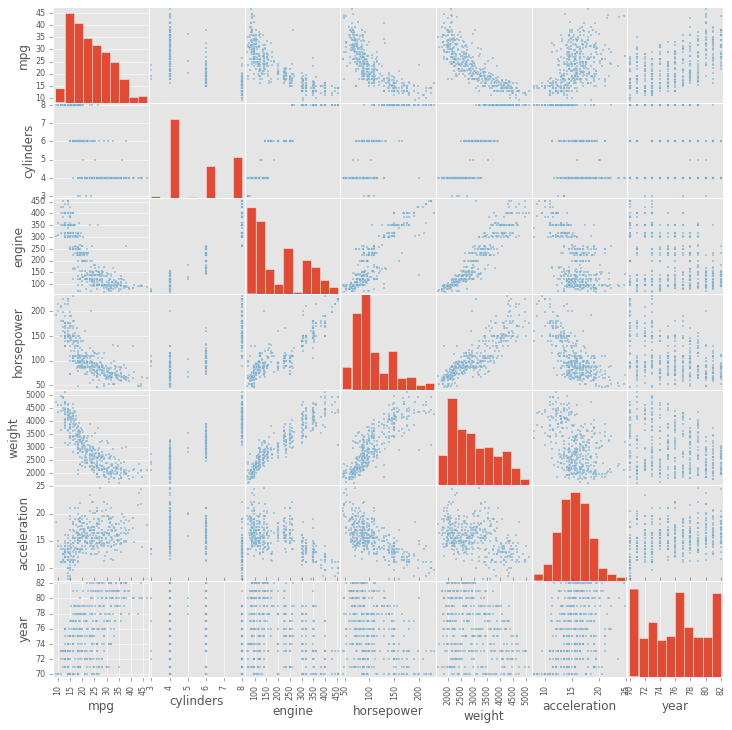

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
f = pd.tools.plotting.scatter_matrix(df_data_1, diagonal='hist',figsize=(12,12))


In [3]:
df_data_1.describe()

,mpg,cylinders,engine,horsepower,weight,acceleration,year
count,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000
mean,23.368966,5.475369,194.779557,105.524631,2979.413793,15.519704,75.921182
std,7.808145,1.712160,104.922458,38.922057,847.004328,2.803359,3.748737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,76.000000,2226.500000,13.700000,73.000000
50%,22.350000,4.000000,151.000000,95.000000,2822.500000,15.500000,76.000000
75%,29.000000,8.000000,302.000000,130.000000,3618.250000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [4]:
import brunel
%brunel data('df_data_1') x(mpg) y(weight) color(origin) :: width=800, height=300


<IPython.core.display.Javascript object>

In [5]:

df_data_1.describe()

,mpg,cylinders,engine,horsepower,weight,acceleration,year
count,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000
mean,23.368966,5.475369,194.779557,105.524631,2979.413793,15.519704,75.921182
std,7.808145,1.712160,104.922458,38.922057,847.004328,2.803359,3.748737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,76.000000,2226.500000,13.700000,73.000000
50%,22.350000,4.000000,151.000000,95.000000,2822.500000,15.500000,76.000000
75%,29.000000,8.000000,302.000000,130.000000,3618.250000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [6]:
# Importing LabelEncoder and initializing it
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
# Iterating over all the common columns in train and test
for col in df_data_1.columns.values:
       # Encoding only categorical variables
        if df_data_1[col].dtypes=='object':
        # Using whole data to form an exhaustive list of levels
            data=df_data_1[col].append(df_data_1[col])
            le.fit(data.values)
            df_data_1[col]=le.transform(df_data_1[col])


In [7]:
df_data_1.describe()

,mpg,cylinders,engine,horsepower,weight,acceleration,year,origin,name
count,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000
mean,23.368966,5.475369,194.779557,105.524631,2979.413793,15.519704,75.921182,0.568966,151.679803
std,7.808145,1.712160,104.922458,38.922057,847.004328,2.803359,3.748737,0.797479,91.537112
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000,0.000000
25%,17.000000,4.000000,105.000000,76.000000,2226.500000,13.700000,73.000000,0.000000,66.250000
50%,22.350000,4.000000,151.000000,95.000000,2822.500000,15.500000,76.000000,0.000000,152.000000
75%,29.000000,8.000000,302.000000,130.000000,3618.250000,17.175000,79.000000,1.000000,230.750000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,2.000000,311.000000


In [50]:

from sklearn.decomposition import PCA
# declare PCA model with 3 components
pca = PCA(n_components=3)
pca.fit(df_data_1)
featReduced = pca.fit_transform(df_data_1)


In [65]:
print featReduced.shape

(406, 3)


In [8]:
# import K-means and PCA library
from sklearn.cluster import KMeans
import numpy as np
# declare a K-means model with 4 clusters 
kmeans = KMeans(n_clusters=4, tol=0.00001, random_state=1)
# run K-means with our data
kmeans.fit(df_data_1)
# get the label for each building using the K-means model
labels = kmeans.predict(df_data_1)
buildings = np.asarray(df_data_1['origin'].values.tolist())

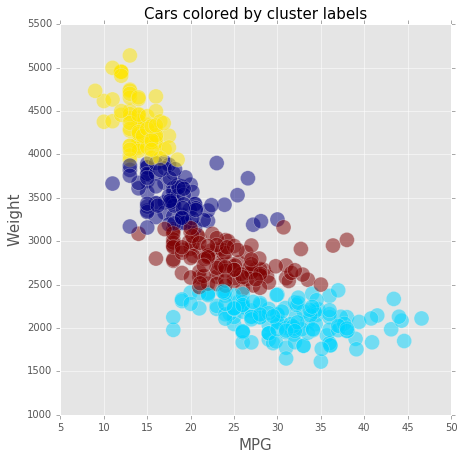

In [9]:
# inefficiency dimensions: ['plug_load_consumption','ac_consumption','domestic_gas','heating_gas']
x = df_data_1['mpg'] 
y = df_data_1['weight'] 
plt.scatter(x, y, s=225, c=labels, alpha=0.5)
plt.gcf().set_size_inches( (7, 7) )
plt.xlabel('MPG',fontsize=15)
plt.ylabel('Weight',fontsize=15)
tt = 'Cars colored by cluster labels' 
plt.title(tt,fontsize=15)
plt.show()